In [97]:
from aocd import get_data
from collections import deque

r="""broadcaster -> a
%a -> inv, con
&inv -> b
%b -> con
&con -> output"""
r2="""broadcaster -> a, b, c
%a -> b
%b -> c
%c -> inv
&inv -> a"""

r=get_data(day=20, year=2023)
r=r.split('\n')
lo,hi=0,1

M={}
MEM,TYPE,OUTPUTS=0,1,2
for line in r:
    name,outputs=line.split(' -> ')
    if name=="broadcaster":
        port,name="br",name
    else:
        port,name=name[0],name[1:]
    output=outputs.split(', ')
    if port=='%':
        m=lo
    else:
        m={}
    M[name]=[m,port,output]
# M[name] = (memory state, type poort, [outputs])
for m in M:
    inp={}
    for outp in M[m][OUTPUTS]:
        if outp in M and M[outp][TYPE]=='&':
            M[outp][MEM][m]=0

def all_one(m):
    a=True
    for i in m:
        if i==0:
            a=False
            break
    return a

#name, output, pulse
tot_lo,tot_hi=0,0
for i in range(1000):
    Q = deque([("broadcaster", x, 0) for x in M['broadcaster'][OUTPUTS]])
    # button pressed: count 1
    tot_lo+=1
    while Q:
        name, output, pulse = Q.popleft()
        tot_hi,tot_lo=(tot_hi+pulse,tot_lo+1-pulse) 
        if output not in M:
            continue
        m=M[output]
        #print("->",name,output,pulse,m)
        if m[TYPE]== "%":
            if pulse == 0:
                m[MEM]^=1 # toggle mem
                for outp in m[OUTPUTS]:
                    Q.append((output, outp, m[MEM]))
        else:
            m[MEM][name] = pulse
            result=0 if all_one(m[MEM].values()) else 1
            #print("& name,pulse,result",name,pulse,result)
            for x in m[OUTPUTS]:
                Q.append((output, x, result))

      

tot_lo,tot_hi,tot_lo*tot_hi

(18122, 48910, 886347020)

In [2]:
from aocd import get_data
from collections import deque

r="""broadcaster -> a
%a -> inv, con
&inv -> b
%b -> con
&con -> output"""
r2="""broadcaster -> a, b, c
%a -> b
%b -> c
%c -> inv
&inv -> a"""

r=get_data(day=20, year=2023)
r=r.split('\n')
lo,hi=0,1

M={}
MEM,TYPE,OUTPUTS=0,1,2
for line in r:
    name,outputs=line.split(' -> ')
    if name=="broadcaster":
        port,name="br",name
    else:
        port,name=name[0],name[1:]
    output=outputs.split(', ')
    if port=='%':
        m=lo
    else:
        m={}
    M[name]=[m,port,output]
# M[name] = (memory state, type poort, [outputs])
rx=[]
for m in M:
    inp={}
    for outp in M[m][OUTPUTS]:
        if outp=='gf':
            rx.append(m)
        if outp in M and M[outp][TYPE]=='&':
            M[outp][MEM][m]=0
print(rx)
cycles={m:0 for m in M}
maxcycles={m:0 for m in M}
update={m:0 for m in M}

monitor = [m for m in M if M[m][TYPE]=="&"]

def all_one(m):
    a=True
    for i in m:
        if i==0:
            a=False
            break
    return a

#name, output, pulse
tot_lo,tot_hi=0,0
button=1
for button in range(1,10000):
    Q = deque([("broadcaster", x, 0) for x in M['broadcaster'][OUTPUTS]])
    # button pressed: count 1
    #button+=1
    
    while Q:
        name, output, pulse = Q.popleft()
        
        if output not in M:
            continue
        if not pulse and name in monitor and name not in update:
            print("monitor")
            prev=cycles[name]
            cycles[name]=button
            cyc=button-prev
            maxcycles[name]=max(maxcycles[name],cyc)
            print("& name,button,cycle",name,button,cyc,maxcycles[name])
            update[name]=1        #     update[output]+=1
#     cycles[output].append(pulse)

        m=M[output]
        #print("->",name,output,pulse,m)
        if m[TYPE]== "%":
            if pulse == 0:
                m[MEM]^=1 # toggle mem
                for outp in m[OUTPUTS]:
                    Q.append((output, outp, m[MEM]))
        else:
            m[MEM][name] = pulse
            result=0 if all_one(m[MEM].values()) else 1
            if result==0:
                if not update[name]==1:
                    prev=cycles[name]
                    cycles[name]=button
                    cyc=button-prev
                    maxcycles[name]=max(maxcycles[name],cyc)
                    print("& name,button,cycle",name,button,cyc,maxcycles[name])
                    update[name]=1
            for x in m[OUTPUTS]:
                Q.append((output, x, result))

tot_lo,tot_hi,tot_lo*tot_hi      

['qs', 'sv', 'pg', 'sp']
& name,button,cycle rn 1 1 1
& name,button,cycle jt 1 1 1
& name,button,cycle mh 1 1 1
& name,button,cycle pz 1 1 1
& name,button,cycle jp 3761 3761 3761
& name,button,cycle bx 3907 3907 3907
& name,button,cycle jq 3919 3919 3919
& name,button,cycle nv 4051 4051 4051


(0, 0, 0)

In [33]:
import math
math.lcm(3761,3907,3919,4051)


233283622908263

In [27]:
bin(3761)

'0b111010110001'

In [28]:
"100011010111"[::-1]

'111010110001'

In [31]:
from aocd import get_data
from collections import deque

r="""broadcaster -> a
%a -> inv, con
&inv -> b
%b -> con
&con -> output"""
r2="""broadcaster -> a, b, c
%a -> b
%b -> c
%c -> inv
&inv -> a"""

r=get_data(day=20, year=2023)
r=r.split('\n')
lo,hi=0,1

M={}
MEM,TYPE,OUTPUTS=0,1,2
for line in r:
    name,outputs=line.split(' -> ')
    if name=="broadcaster":
        port,name="br",name
    else:
        port,name=name[0],name[1:]
    output=outputs.split(', ')
    if port=='%':
        m=lo
    else:
        m={}
    M[name]=[m,port,output]



In [3]:
# import graphviz
# dot=graphviz.Digraph('pulse', comment='Day 20') 

# for m in M:
#     dot.edge(m,M[m][TYPE]+m)
M['rx']=[0,"End",[]]
for m in M:
    
    for n in M[m][OUTPUTS]:
        print(f"{m} -> {n} ")

for m in M:
    if M[m][TYPE]=="&":
        print(f"{m} [shape=box, color=\"#ff9100\"];")
    elif M[m][TYPE]=="End":
        print(f"{m} [shape=box, color=\"#0000ff\"];")
        

tx -> dx 
nx -> fn 
nx -> rn 
nr -> cj 
nr -> mh 
nk -> jt 
nk -> vk 
mv -> fk 
mv -> rn 
pz -> kt 
pz -> pg 
pz -> mb 
pz -> vr 
pz -> hp 
pz -> jp 
pz -> tx 
jt -> fb 
jt -> zb 
jt -> jq 
jt -> sv 
jt -> lp 
vp -> lp 
vp -> jt 
qs -> gf 
lj -> jt 
lj -> dt 
jh -> mh 
xc -> nx 
hx -> xb 
kd -> pz 
kd -> pp 
jq -> jt 
jq -> qt 
lp -> jm 
ph -> mb 
ph -> pz 
sv -> gf 
ff -> xc 
th -> mh 
th -> hx 
kt -> ct 
ct -> kd 
ct -> pz 
mh -> bc 
mh -> qs 
mh -> hx 
mh -> xb 
mh -> nv 
pg -> gf 
fn -> kn 
sk -> hr 
nv -> mh 
nv -> th 
dx -> pz 
dx -> ph 
broadcaster -> bx 
broadcaster -> jq 
broadcaster -> nv 
broadcaster -> jp 
dt -> jt 
dt -> zb 
fx -> sk 
fx -> rn 
rv -> rn 
gv -> mh 
gv -> nr 
fk -> rn 
fk -> rv 
cj -> mh 
cj -> vh 
xk -> jt 
xk -> nk 
vh -> mh 
vh -> jh 
zb -> fb 
mb -> jc 
kn -> rn 
kn -> mv 
jc -> pz 
jc -> kt 
sp -> gf 
hp -> tx 
jf -> bc 
jf -> mh 
fb -> vp 
xm -> mh 
xm -> gv 
jm -> jt 
jm -> xk 
vr -> hp 
hr -> ff 
jp -> pz 
jp -> vr 
rn -> fn 
rn -> hr 
rn -> bx 
rn -

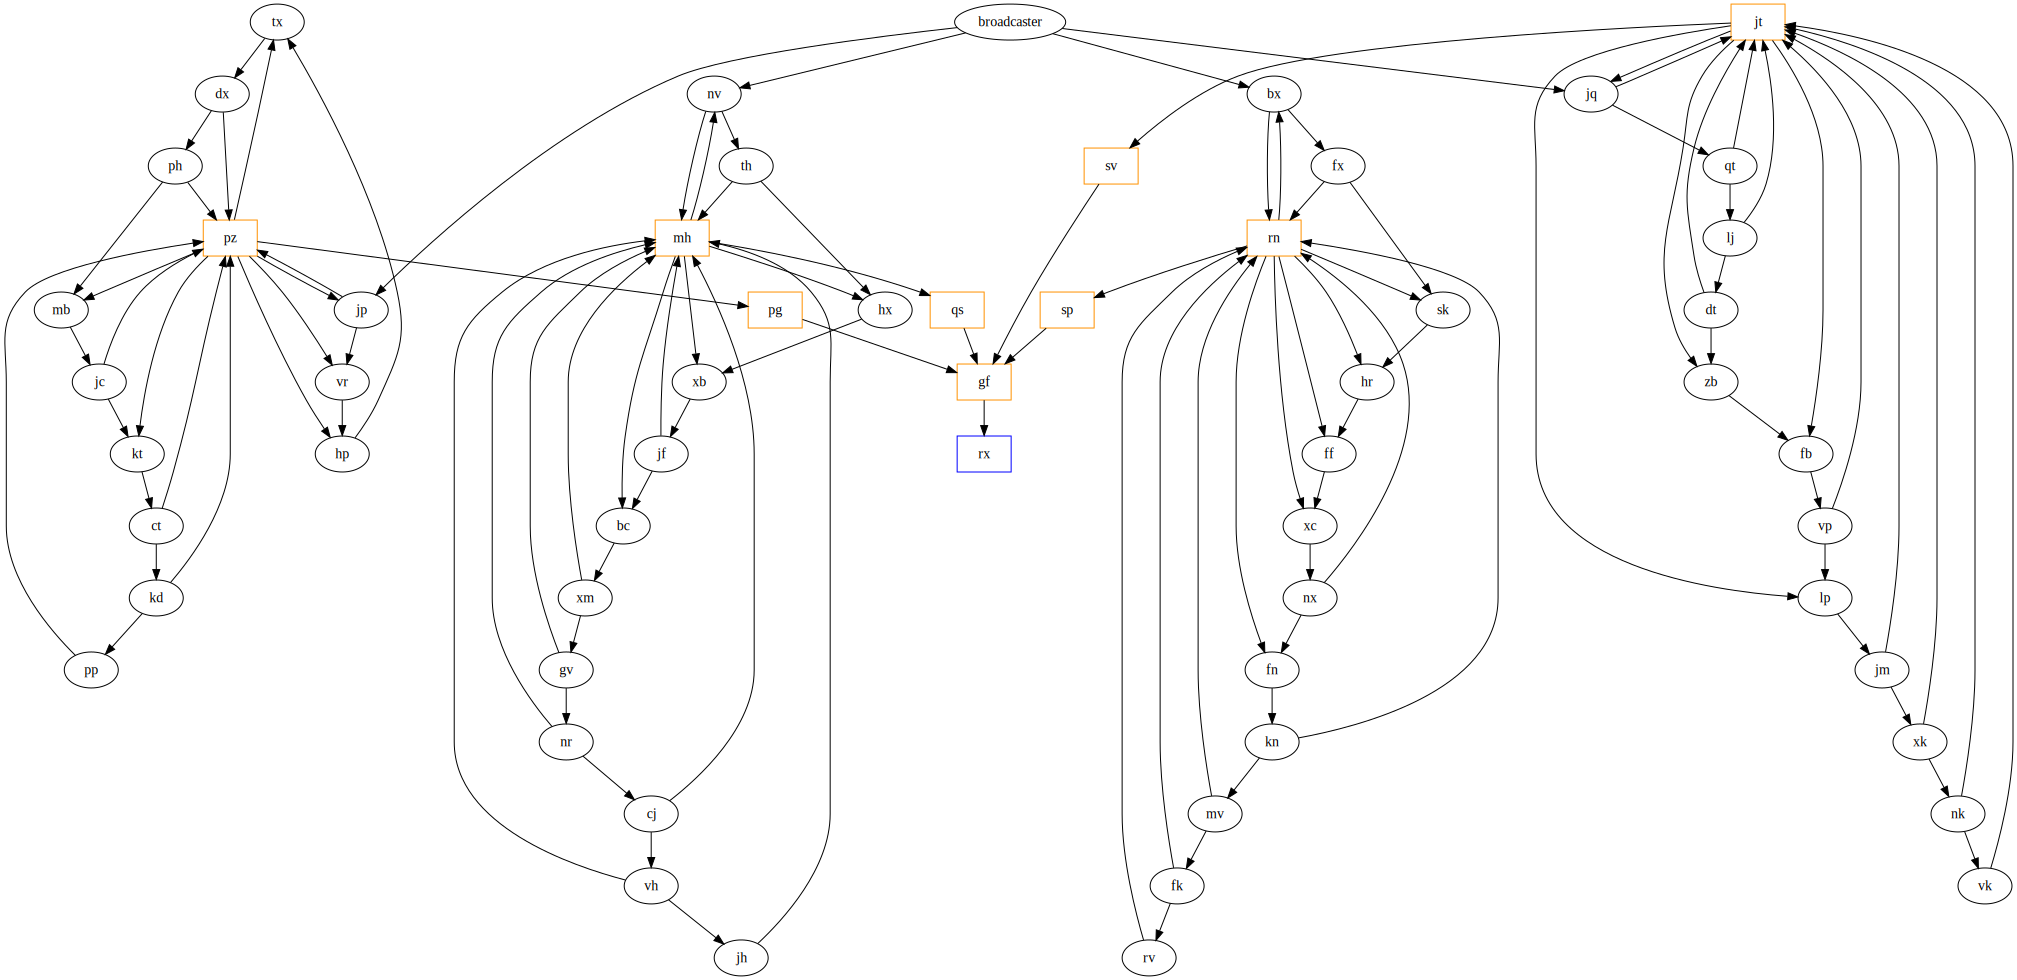

In [6]:
from IPython.display import SVG
SVG("day20_graph.svg")